In [144]:
%matplotlib inline

In [145]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import affine_transform
from shapely.geometry import mapping


In [146]:
# Replace 'path/to/your_shapefile.shp' with the actual path to your shapefile

geojson_net_path = '24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson'
geojson_fie_path = '24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson'

# Siedlce OSM: '2024-01-24_siedlce_2180.geojson'
# Siedlce ELEMENTY SIECIOWE: '2024-01-24_elem-siec_isa.geojson'
# Siedlce EIK: '2024-01-31_siedlce_EIK_2180.geojson'
# Warka OSM: '2024-01-31_warka_osm_2180.geojson'
# '2024-01-31_warka_osm_2180.geojson'
#Skierniewice: '2024-02-01_skierniewice_2180_osm.geojson'

#24-04

#24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-input_Tarnowo-Pom.geojson
#24-04-24_template_geo2scheme_geojson_FIE-input_Tarnowo-Pom.geojson


In [147]:
# Read the shapefile
gdf = gpd.read_file(geojson_net_path)

In [148]:
# Read the shapefile
gdf_fie = gpd.read_file(geojson_fie_path)

In [149]:
# Extract non-spatial properties
non_spatial_properties = gdf.drop(columns='geometry')

In [150]:
# Extract non-spatial properties
non_spatial_properties_fie = gdf_fie.drop(columns='geometry')

In [151]:
# Explore the GeoDataFrame
print(gdf.head())

    id ID_1                                           geometry
0  NaN    2  MULTILINESTRING ((258326.826 610651.661, 25811...
1  NaN    4  MULTILINESTRING ((258077.418 610706.306, 25805...
2  3.0    3  MULTILINESTRING ((258112.685 610702.554, 25807...
3  NaN    6  MULTILINESTRING ((257534.323 610835.472, 25751...
4  5.0    4  MULTILINESTRING ((258050.300 610711.219, 25753...


<Axes: >

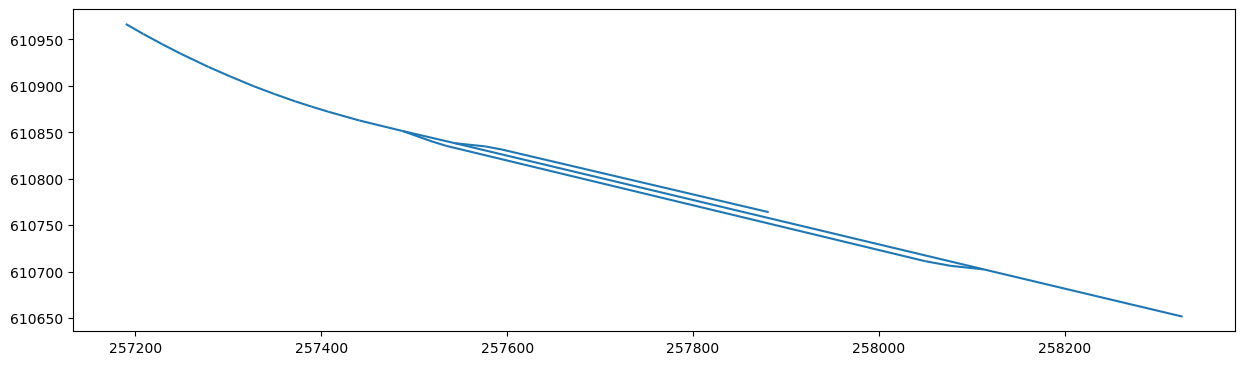

In [152]:
# Visualize the data
gdf.plot(figsize=(15, 15))

<Axes: >

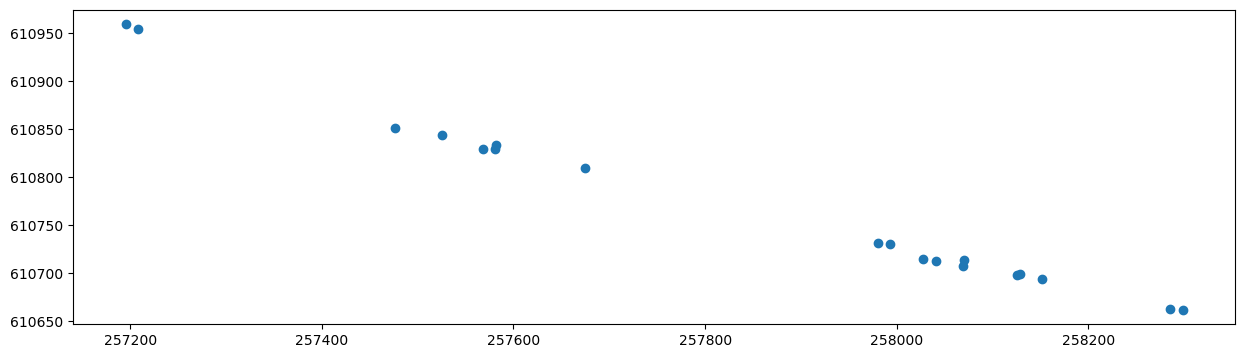

In [153]:
# Visualize the data
gdf_fie.plot(figsize=(15, 15))

In [154]:
rotate_angle = -166.5

#Siedlce: 38
#Tarnowo Pomorskie -166.5

In [155]:
df_rotated2 = gdf.rotate(rotate_angle, origin=gdf.unary_union.centroid)

In [156]:
df_rotated2_fie = gdf_fie.rotate(rotate_angle, origin=gdf.unary_union.centroid)

<Axes: >

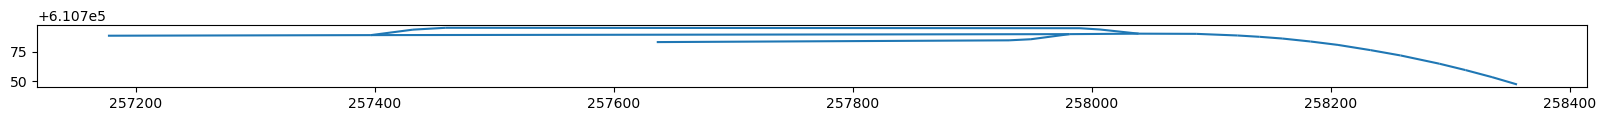

In [157]:
df_rotated2.plot(figsize=(20, 20))

<Axes: >

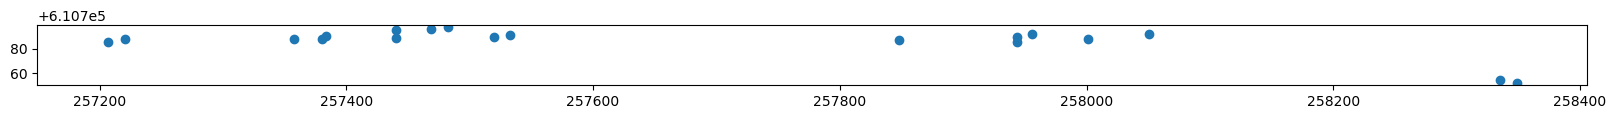

In [158]:
df_rotated2_fie.plot(figsize=(20, 20))

In [159]:
# Explore the GeoDataFrame
print(gdf.head())

    id ID_1                                           geometry
0  NaN    2  MULTILINESTRING ((258326.826 610651.661, 25811...
1  NaN    4  MULTILINESTRING ((258077.418 610706.306, 25805...
2  3.0    3  MULTILINESTRING ((258112.685 610702.554, 25807...
3  NaN    6  MULTILINESTRING ((257534.323 610835.472, 25751...
4  5.0    4  MULTILINESTRING ((258050.300 610711.219, 25753...


In [160]:
# Explore the GeoDataFrame
print(df_rotated2.head())

0    MULTILINESTRING ((257176.772 610788.210, 25739...
1    MULTILINESTRING ((257432.046 610793.297, 25745...
2    MULTILINESTRING ((257396.877 610788.713, 25743...
3    MULTILINESTRING ((257990.289 610794.484, 25800...
4    MULTILINESTRING ((257459.562 610794.851, 25799...
dtype: geometry


In [161]:
# TO DELETE

# Save the GeoDataFrame as a GeoJSON file
df_rotated2.to_file('temp_net.geojson', driver='GeoJSON')

In [162]:
# TO DELETE

# Save the GeoDataFrame as a GeoJSON file
df_rotated2_fie.to_file('temp_fie.geojson', driver='GeoJSON')

In [163]:
#TO DELETE
geojson_path2 = 'temp_net.geojson'

In [164]:
#TO DELETE
geojson_path2_fie = 'temp_fie.geojson'

In [165]:
# Wczytaj plik GeoJSON
gdf = gpd.read_file(geojson_path2)

In [166]:
# Wczytaj plik GeoJSON
gdf_fie = gpd.read_file(geojson_path2_fie)

In [167]:
# Oblicz minimalne współrzędne (xmin, ymin) dla każdego z geometrii
min_coords = gdf.bounds.min()

In [168]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf['geometry'] = gdf.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [169]:
# Przesuń wszystkie geometrie w lewo i w dół o wartości minimalnych współrzędnych
gdf_fie['geometry'] = gdf_fie.translate(xoff=-min_coords['minx'], yoff=-min_coords['miny'])

In [170]:
# Merge non-spatial properties back into the modified GeoDataFrame
gdf = gpd.GeoDataFrame(non_spatial_properties, geometry=gdf['geometry'])

In [171]:
# Explore the GeoDataFrame
print(gdf.head())

    id ID_1                                           geometry
0  NaN    2   MULTILINESTRING ((0.000 40.781, 220.105 41.284))
1  NaN    4  MULTILINESTRING ((255.274 45.868, 282.790 47.4...
2  3.0    3  MULTILINESTRING ((220.105 41.284, 255.274 45.8...
3  NaN    6  MULTILINESTRING ((813.516 47.055, 830.129 45.9...
4  5.0    4  MULTILINESTRING ((282.790 47.422, 813.516 47.0...


<Axes: >

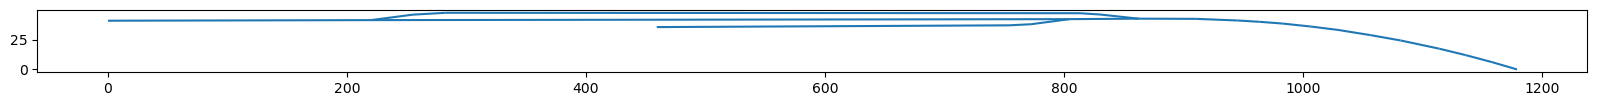

In [172]:
gdf.plot(figsize=(20, 20))

<Axes: >

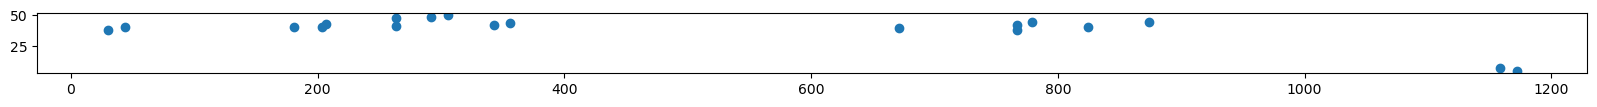

In [173]:
gdf_fie.plot(figsize=(20, 20))

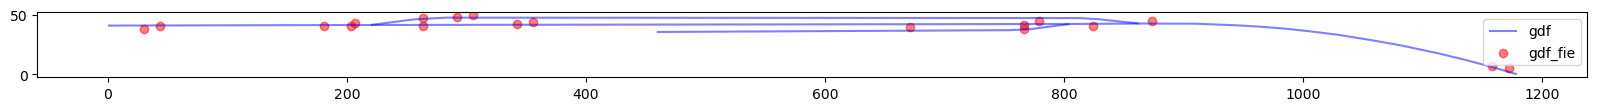

In [174]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [175]:
# Function to scale the x-coordinates by a factor
def scale_x(geometry, factor):
    return affine_transform(geometry, [factor, 0, 0, 1, 0, 0])

In [176]:
# Apply the scaling operation to the geometry column
gdf['geometry'] = gdf['geometry'].apply(scale_x, factor=1/4)

In [177]:
# Apply the scaling operation to the geometry column
gdf_fie['geometry'] = gdf_fie['geometry'].apply(scale_x, factor=1/4)

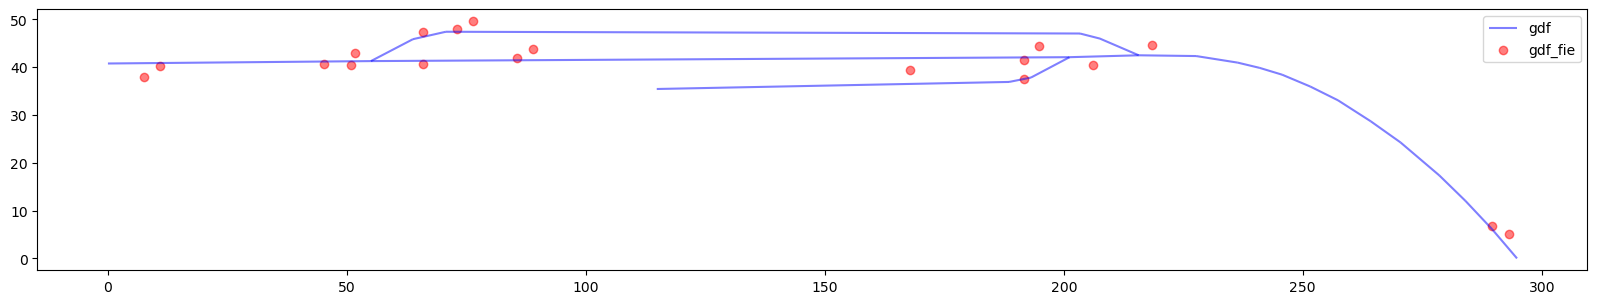

In [178]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [179]:
# Explore the GeoDataFrame
print(gdf.head())

    id ID_1                                           geometry
0  NaN    2    MULTILINESTRING ((0.000 40.781, 55.026 41.284))
1  NaN    4   MULTILINESTRING ((63.818 45.868, 70.697 47.422))
2  3.0    3   MULTILINESTRING ((55.026 41.284, 63.818 45.868))
3  NaN    6  MULTILINESTRING ((203.379 47.055, 207.532 45.9...
4  5.0    4  MULTILINESTRING ((70.697 47.422, 203.379 47.055))


<Axes: >

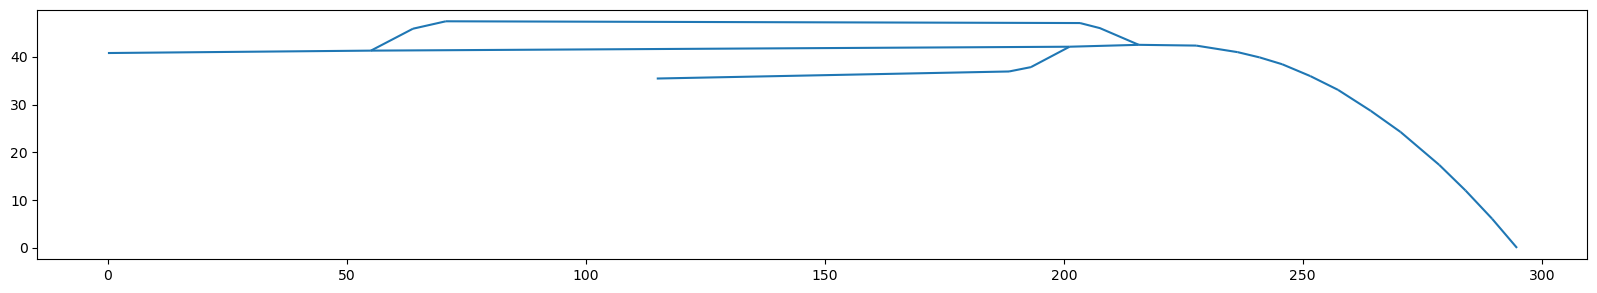

In [180]:
gdf.plot(figsize=(20, 20))

In [181]:
print(gdf.head())

    id ID_1                                           geometry
0  NaN    2    MULTILINESTRING ((0.000 40.781, 55.026 41.284))
1  NaN    4   MULTILINESTRING ((63.818 45.868, 70.697 47.422))
2  3.0    3   MULTILINESTRING ((55.026 41.284, 63.818 45.868))
3  NaN    6  MULTILINESTRING ((203.379 47.055, 207.532 45.9...
4  5.0    4  MULTILINESTRING ((70.697 47.422, 203.379 47.055))


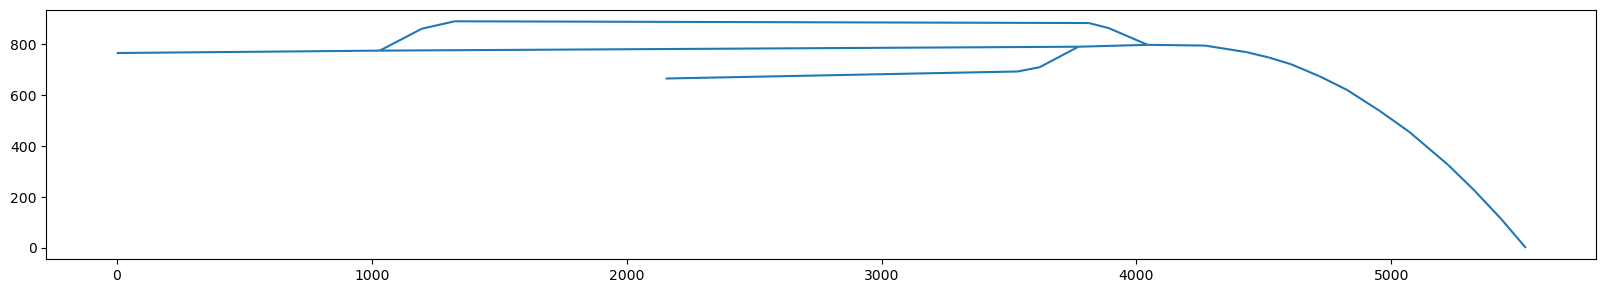

In [182]:
# Function to scale both x and y coordinates by a factor with origin at (0,0)
def scale_xy(geometry, factor):
    # Apply scaling transformation with origin at (0,0)
    return affine_transform(geometry, [factor, 0, 0, factor, 0, 0])

# Apply the scaling operation to the geometry column
gdf['geometry'] = gdf['geometry'].apply(scale_xy, factor=18.75)

# Plot the scaled geometries
gdf.plot(figsize=(20, 20))
plt.show()


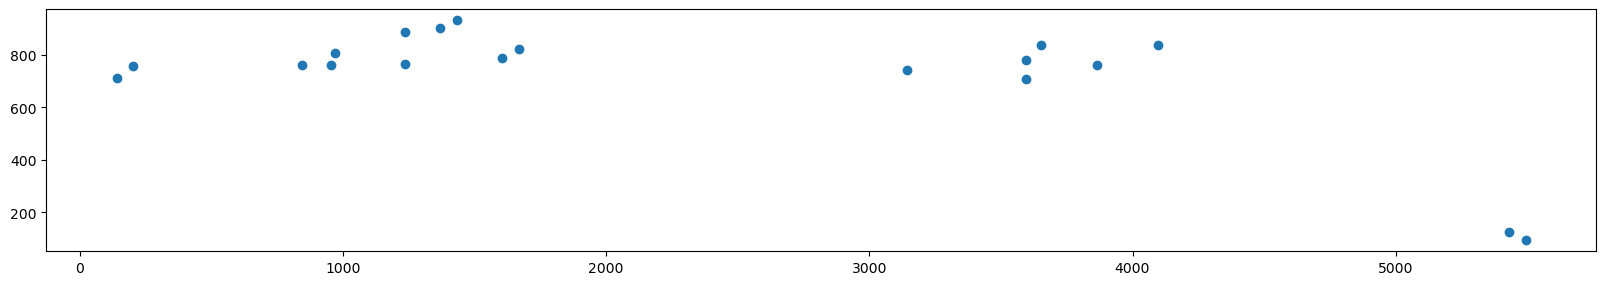

In [183]:
# Apply the scaling operation to the geometry column
gdf_fie['geometry'] = gdf_fie['geometry'].apply(scale_xy, factor=18.75)

# Plot the scaled geometries
gdf_fie.plot(figsize=(20, 20))
plt.show()


In [184]:
print(gdf.head())

    id ID_1                                           geometry
0  NaN    2  MULTILINESTRING ((0.000 764.648, 1031.742 774....
1  NaN    4  MULTILINESTRING ((1196.596 860.033, 1325.578 8...
2  3.0    3  MULTILINESTRING ((1031.742 774.074, 1196.596 8...
3  NaN    6  MULTILINESTRING ((3813.358 882.282, 3891.230 8...
4  5.0    4  MULTILINESTRING ((1325.578 889.171, 3813.358 8...


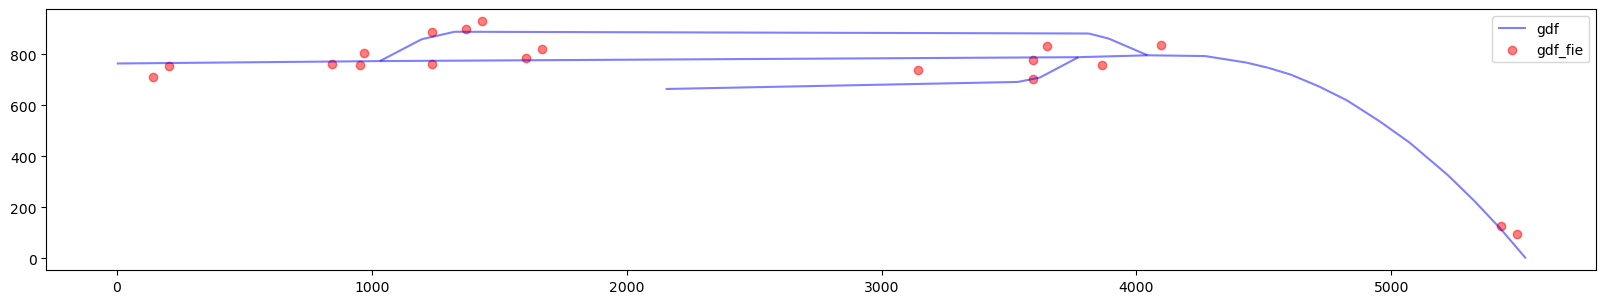

In [185]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the first GeoDataFrame on the specified axis
gdf.plot(ax=ax, color='blue', alpha=0.5, label='gdf')

# Plot the second GeoDataFrame on the same axis
gdf_fie.plot(ax=ax, color='red', alpha=0.5, label='gdf_fie')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [186]:
# Save the GeoDataFrame as a GeoJSON file
gdf.to_file('24-04-24_template_geo2scheme_geojson_NET-ELEMENTS-output_Tarnowo-Pom.geojson', driver='GeoJSON')

In [187]:
# Save the GeoDataFrame as a GeoJSON file
gdf_fie.to_file('24-04-24_template_geo2scheme_geojson_FIE-output_Tarnowo-Pom.geojson', driver='GeoJSON')